In [1]:
import sys
sys.path.append('..')

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9

In [80]:
%load_ext autoreload
%autoreload 2
from src.feature_selector import FeatureSelector, discretize, conditional_mutual_information
from src.data_generators import DataSetGenerator, draw_function
from src.experiment import Experiment
from src.jmi import JMI
from src.minimax import MiniMax
from src.mifs import MIFS
from src.lasso import LassoFS
from src.rffs import RandomForestFS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
from statsmodels.regression.linear_model import OLS

In [82]:
def generate_fs_list(df, stopping_features=100):
    jmi = JMI(df, unique_th=10, stopping_n_features=10, stopping_criterium=0.01)
    mm = MiniMax(df, unique_th=10, stopping_n_features=min(10, stopping_features))
    mifs = MIFS(df, unique_th=10, stopping_n_features=min(20, stopping_features))
    rffs = RandomForestFS(df)
    lasso = LassoFS(df, unique_th=10)
    return [jmi, mm, mifs, lasso, rffs]

In [125]:
ds_generator = DataSetGenerator(1000, 30, 10, 10)

# Set 1

In [133]:
results_list = []
results_nvars_list =[]
for _ in range(10):
    df, sign_names = ds_generator.set_1()
    features_sets = generate_fs_list(df)
    set1_experiment = Experiment(features_sets, OLS, df, "y", sign_names)
    set1_experiment.fit_fs()
    results_list.append(set1_experiment.results_artifical)
    results_nvars_list.append(set1_experiment.n_variables)

In [163]:
results = pd.concat([res.T for res in results_list]).reset_index()
results.columns = ["model", "value"]
results_nvars = pd.concat([res.T for res in results_nvars_list]).reset_index()
results_nvars.columns = ["model", "n_vars"]

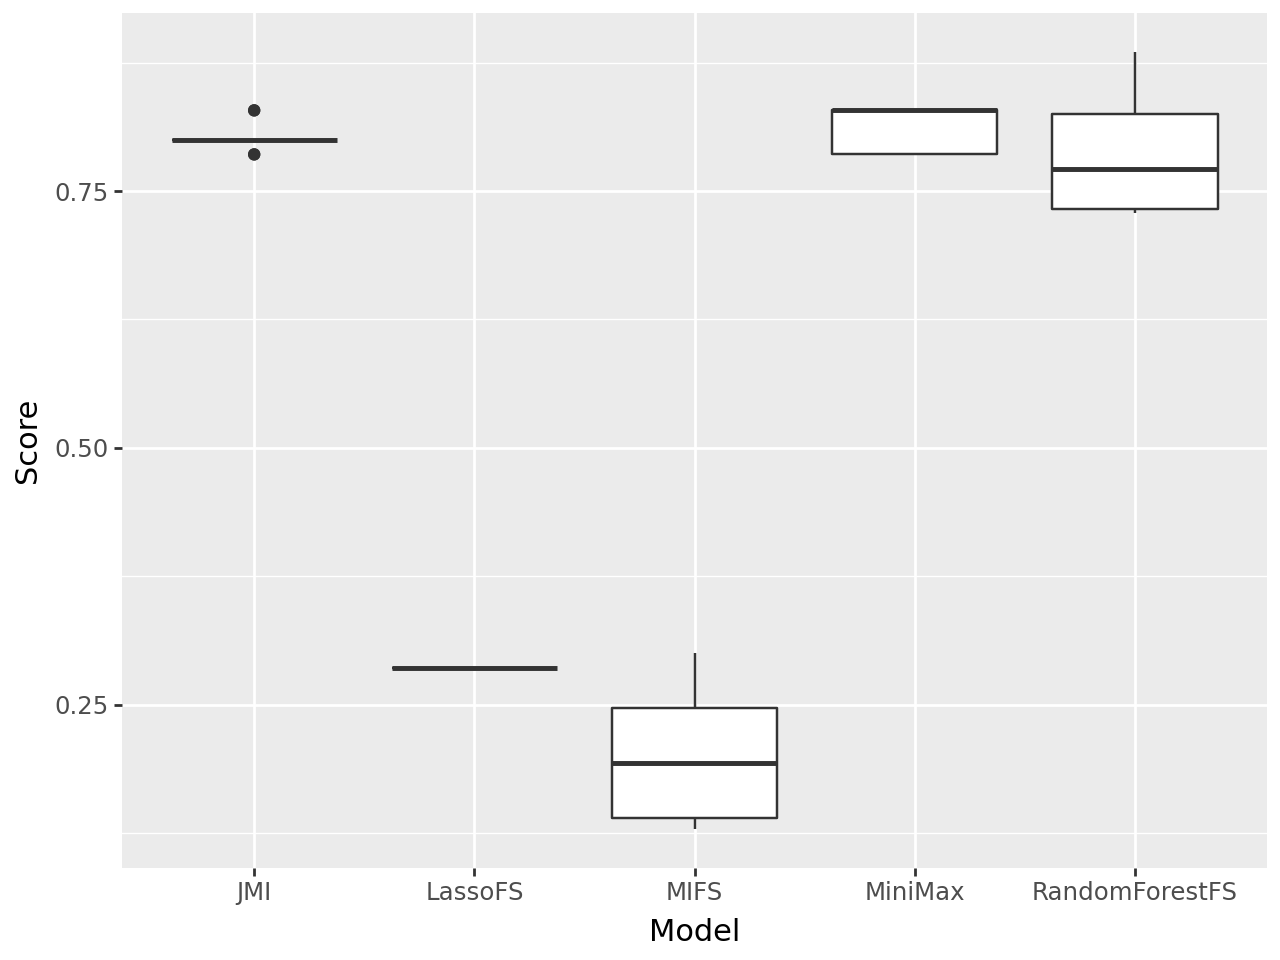

In [162]:
(p9.ggplot(results, p9.aes("model", "value")) +
    p9.geom_boxplot() +
    p9.xlab("Model") +
    p9.ylab("Score"))

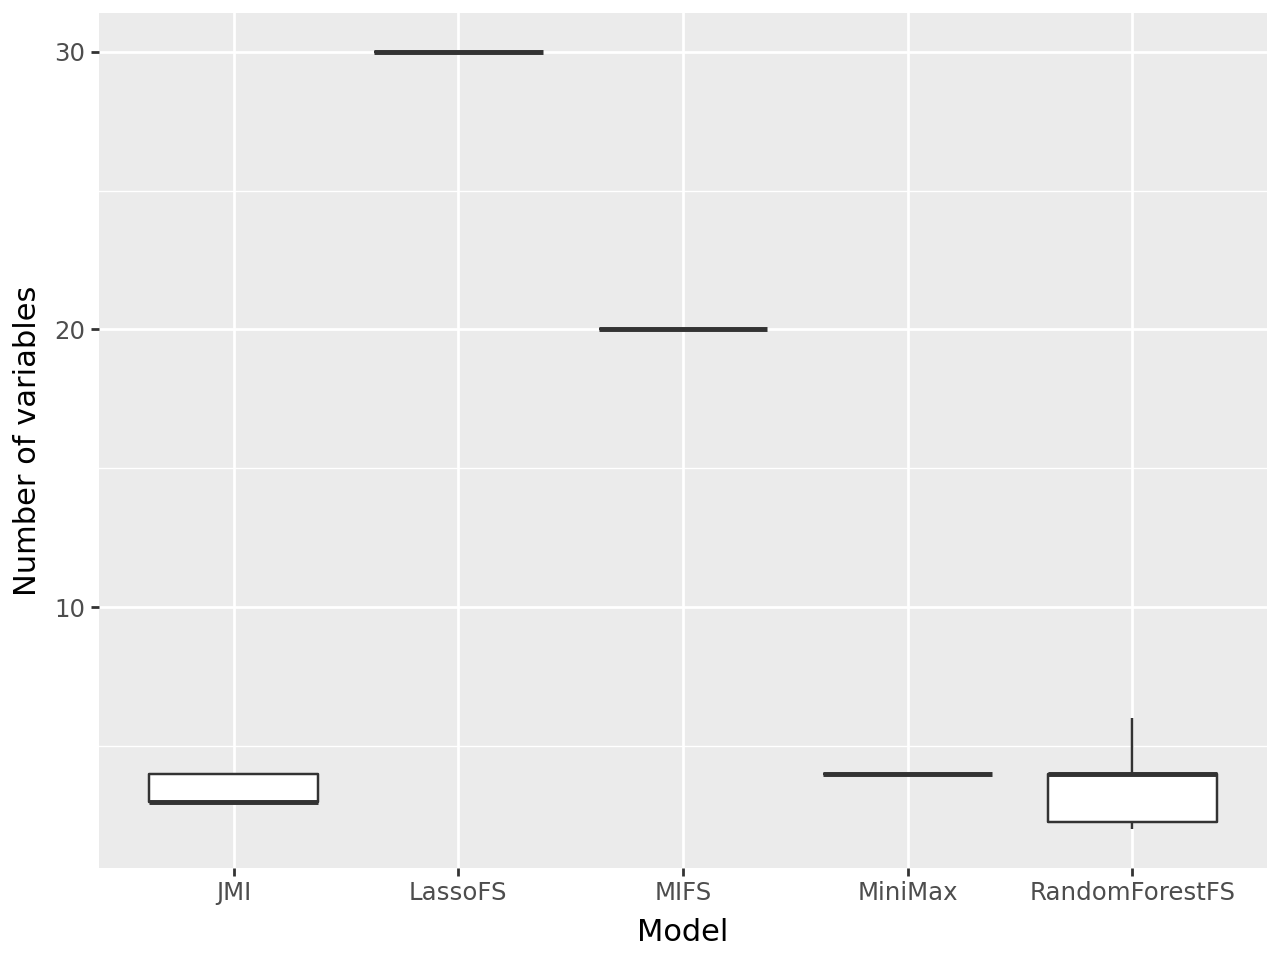

In [166]:
(p9.ggplot(results_nvars, p9.aes("model", "n_vars")) +
    p9.geom_boxplot() +
    p9.xlab("Model") +
    p9.ylab("Number of variables"))

# Set 2

In [ ]:
results_list = []
results_nvars_list =[]
for _ in range(10):
    df, sign_names = ds_generator.set_2()
    features_sets = generate_fs_list(df)
    set1_experiment = Experiment(features_sets, OLS, df, "y", sign_names)
    set1_experiment.fit_fs()
    results_list.append(set1_experiment.results_artifical)
    results_nvars_list.append(set1_experiment.n_variables)

In [ ]:
results = pd.concat([res.T for res in results_list]).reset_index()
results.columns = ["model", "value"]
results_nvars = pd.concat([res.T for res in results_nvars_list]).reset_index()
results_nvars.columns = ["model", "n_vars"]

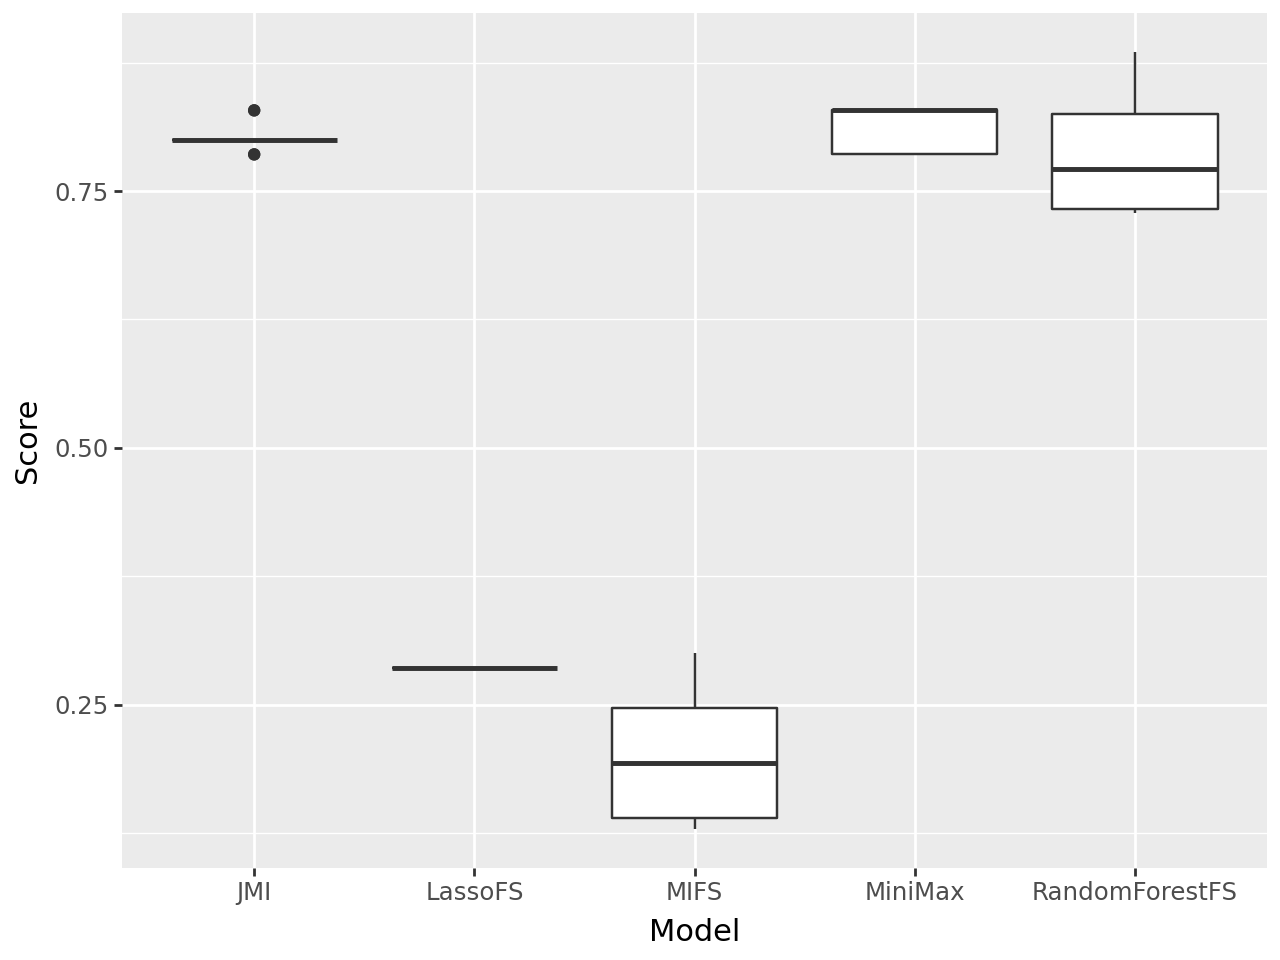

In [ ]:
(p9.ggplot(results, p9.aes("model", "value")) +
    p9.geom_boxplot() +
    p9.xlab("Model") +
    p9.ylab("Score"))

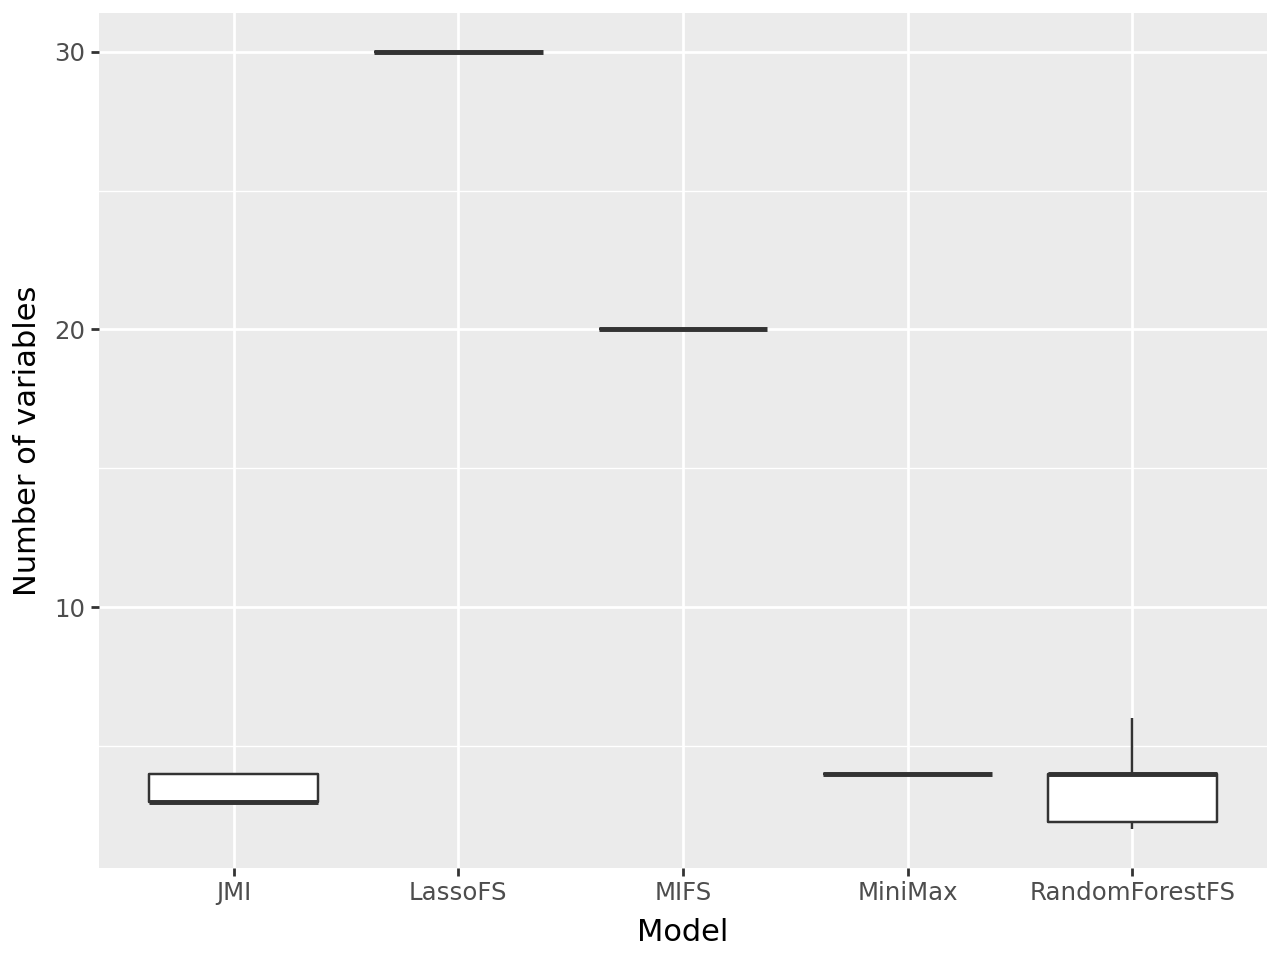

In [ ]:
(p9.ggplot(results_nvars, p9.aes("model", "n_vars")) +
    p9.geom_boxplot() +
    p9.xlab("Model") +
    p9.ylab("Number of variables"))